In [1]:
import numpy as np
import pandas as pd
import os
import warnings
from src import *
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
# from collections import OrderedDict
import matplotlib.pyplot as plt

Index(['Time (min)', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'B1', 'B2', 'B3',
       'B4', 'B5', 'B6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'D1', 'D2', 'D3',
       'D4', 'D5', 'D6', 'Unnamed: 25', 'Input_Image'],
      dtype='object')


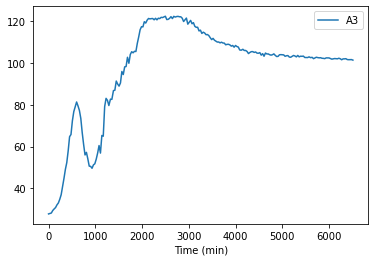

In [2]:
File = os.path.join('data','GP_20210507_171028_MTP03_GValue.csv')
df = pd.read_csv(File, skiprows=23, decimal=',')
df.plot(x='Time (min)', y='A3')
print(df.columns)

{'R2': 0.9957740096448768, 'Slope': 0.0026947494216455954, 'ycorrect': 2.907813342295186, 'time': array([210., 240., 270., 300., 330., 360., 390.]), 'OD': array([32.995, 34.777, 36.954, 40.711, 44.77 , 49.069, 52.322])}


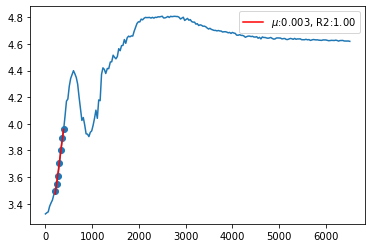

In [3]:
myExp = 'A3'
t = df['Time (min)'].values
x = df[myExp].values
myResult = DetectR2MaxSingle(t,x,3)
print(myResult)
plt.plot(t, np.log(x))
if myResult!=False:
    plt.scatter(myResult['time'], np.log(myResult['OD']))
    plt.plot(myResult['time'], myResult['Slope']*myResult['time'] + myResult['ycorrect'], 'r', label='$\mu$:{:.3f}, R2:{:.2f}'.format(myResult['Slope'], myResult['R2']))
    plt.legend()
    myResult['ID'] = myExp

# myResult

In [ ]:
myCols = df.columns[1:-2]
NumExp = len(myCols)
AxDim = np.ceil(np.sqrt(NumExp))
Partition = 3
t = df['Time (min)'].values
# plt.subplots(AxDim, AxDim, sharex='col')
fig, ax = plt.subplots(figsize=[20,10], sharey=True)
for idx, myExp in enumerate(myCols):
#     print(myExp)
    x = df[myExp].values
    myResult = DetectR2MaxSingle(t,x,Partition)
    plt.subplot(5,5, idx+1)
    plt.plot(t, np.log(x))
    plt.title(myExp)
    if myResult is not False:
        plt.scatter(myResult['time'], np.log(myResult['OD']))
        plt.plot(myResult['time'], myResult['Slope']*myResult['time'] + myResult['ycorrect'], 'r', label='$\mu$:{:.3f}, R2:{:.2f}'.format(myResult['Slope'], myResult['R2']))
        myResult['ID'] = myExp
        plt.legend()
    plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    
fig.text(0.5, 0.1, 'time', ha='center')
fig.text(0.1, 0.5, 'ln(OD)', va='center', rotation='vertical')
plt.savefig('myPlots.svg', format='svg')